<h1><center>LINMA2472 : Project 2 - part 2, Random Fourier Features </center></h1>

$\textbf{Author}$: Remi Delogne, remi.delogne@uclouvain.be

Import the following packages and functions. Refer to their documentation on the internet for more information on installation and usage.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from keras.datasets import mnist #Contains the dataset

from matplotlib import pyplot
import plotly.express as px
import plotly.io as pio
import kaleido
pio.renderers.default = "notebook"


import time #Used to find the execution time of a part of the code
import random
import math

from IPython.display import display, HTML #For visual comfort
display(HTML("<style>.container { width:80% !important; }</style>"))

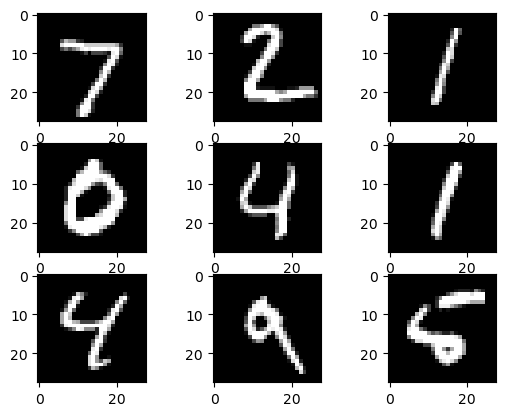

(10000, 784)


In [2]:
# load dataset and rescale the data to [0,15]
''' load dataset: (we use the larger subset for testing and the smaller 
for training to demonstrate the efficiency of evaluating of new instances with RFF)'''
(testX,testy),(trainX,trainy) = mnist.load_data()
#Rescaling
trainX = np.floor(trainX/16)
testX = np.floor(testX/16)

#Plot some images, for fun
for i in range(9):
    pyplot.subplot(330+1+i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

#Put the data in vector form
trainX=trainX.reshape((10000,-1))
testX=testX.reshape((60000,-1))
print(trainX.shape)

### Train a linear SVM on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the classifier takes to evaluate the 60.000 testing instances.

Use the accuracy metric to judge the quality of your classifier.

In [3]:
#Define the classifier
clfLin=svm.SVC(kernel="linear")

#Train the classifier
tik = time.perf_counter() # Start measuring training time
clfLin.fit(trainX,trainy)
tok = time.perf_counter() # Stop measuring training time
linear_training_time = tok - tik

#Evaluate its accuracy
tik = time.perf_counter()
predicted=clfLin.predict(testX)
score_linear=accuracy_score(testy,predicted)
tok = time.perf_counter()
linear_testing_time = tok - tik

print(f"Training finished in {linear_training_time:.3f} seconds,")
print(f"Testing Finished in {linear_testing_time:.3f} seconds with accuracy of {score_linear:.3f}.")

Training finished in 3.977 seconds,
Testing Finished in 26.975 seconds with accuracy of 0.907.


### Train a Kernel SVM with the Gaussian Kernel on the training data and evaluate it on the testing data
Use the tik-tok method to see how long the classifier takes to evaluate the $60000$ testing instances.

Use the accuracy metric to judge the quality of your classifier.

In [4]:
#Define the classifier
clfKernel=svm.SVC(kernel='rbf')
#Train it
tik = time.perf_counter()
clfKernel.fit(trainX, trainy)
tok = time.perf_counter()
rbf_training_time = tok - tik

#Use it
tik = time.perf_counter()
predicted=clfKernel.predict(testX)
score_rbf=accuracy_score(testy,predicted)
tok = time.perf_counter()
rbf_testing_time = tok - tik

print(f"Training finished in {rbf_training_time:.3f} seconds,")
print(f"Testing Finished in {rbf_testing_time:.3f} seconds with accuracy of {score_rbf:.3f}.")

Training finished in 6.964 seconds,
Testing Finished in 64.603 seconds with accuracy of 0.956.


### Use the following functions to implement Random Fourier Features

You are here going to try to approximate the Gaussian kernel used in the second classfier.

Use the first function to generate your $\boldsymbol\omega_i$ (using an appropriate distribution) and your $b_i$ (using appropriate distributions), this should return $D$ vectors $\boldsymbol\omega_i\in\mathbb R^d$ (in the form of a matrix for example) and $D$ values $b_i\in[0,2\pi]$. 

Use the second function to create the mapping $\boldsymbol z(\boldsymbol x)$ as described in the slides.

In [5]:
def generate_freq(D, d, sigma, mu=0):
  # The fourrier transform of gaussian kernel is approximatly the gaussian distribution 
  # gaussian distribution can be computed with numpy.random.normal
  W = []
  b = []

  for i in range(D):
    W.append(np.random.normal(mu, sigma, d))
    b.append(np.random.uniform(0, 2*np.pi))

  return np.array(W), np.array(b)


def transform(x, W, b, D):
  Z = np.cos(x @ W.T + b) * (np.sqrt(2/D))
  return Z

### Transform your trainX and testX

Use the function you defined to transform your data.

Make sure you only generate $\boldsymbol W$ and $\boldsymbol b$ once.

Use a standard deviation of $\frac{1}{100}$ et $D=300$ random features to start with.

You may also use the tik-tok method to time the procedure of creating Random features.

In [6]:
D=300      #Number of sample vectors w_i
sigma=0.01 #standard deviation of distributon
d=28*28    #Original number of dimensions

tik = time.perf_counter()

W,b=generate_freq(D, d, sigma)
trainX_rff=transform(trainX, W, b, D)
testX_rff=transform(testX, W, b, D)

tok = time.perf_counter()
rff_time = tok - tik
print(f"RFF transformation time : {rff_time:.3f} seconds.")

#trainX_rff=np.array(trainX_rff)
#testX_rff=np.array(testX_rff)
#Sanity check, do the dimensions of your transformations match your expectation?
#Bear in mind that there are more instances in the test set than in the trianing set here

#print(f"Dimension of trainX after transformation : {trainX_rff.shape}.")
#print(f"Dimension of testX after transformation : {testX_rff.shape}.")

RFF transformation time : 0.577 seconds.


### Use another linear SVM to classify the transformed data
Now that the instances have been transformed, theory tells us that they are much more ameneable to linear classification than before.

In [8]:
#Define the classifier
clfRff = svm.SVC(kernel="linear",C=np.inf, max_iter=100000)

#Train it
tik = time.perf_counter()
clfRff.fit(trainX_rff, trainy)
tok = time.perf_counter() 
training_time_rff = tok - tik
print(f"Training Finished in {training_time_rff:.3f} seconds")

#Use it
tik = time.perf_counter()
predicted_rff = clfRff.predict(testX_rff)

tok = time.perf_counter()
testing_time_rff = tok - tik
score_rff = accuracy_score(testy,predicted_rff)
print(f"Testing Finished in {testing_time_rff:.3f} seconds with accuracy of {score_rff:.3f}")



Training Finished in 1.537 seconds
Testing Finished in 13.747 seconds with accuracy of 0.897


### Additional workspace 

Investigate the relationship between $D$ and the accuracy of the classifier.

### Don't forget to add plots and other nice things

In [9]:
# Values of D to test the RFF
test_D = [10, 100, 300, 500, 700, 1000]

#Defining vectors to store various values
rff_accuracy=np.zeros(len(test_D))
rff_train_time = np.zeros(len(test_D))
rff_test_time = np.zeros(len(test_D))
rff_generation = np.zeros(len(test_D))
#Initial conditions
d = 28*28
sigma = 0.01

for i in range(len(test_D)):
    D_i = test_D[i]
    W_i,b_i=generate_freq(D_i, d, sigma)
    print(" --------------- ")
    print("D = "+str(D_i))
    print("sampling done")

    # Mesure RFF generating time
    tik = time.perf_counter()
    trainX_RFF = transform(trainX, W_i, b_i, D_i)
    testX_RFF = transform(testX, W_i, b_i, D_i)
    tok = time.perf_counter()
    rff_generation[i] = tok-tik

    #trainX_RFF = np.array(trainX_RFF)
    #testX_RFF = np.array(testX_RFF)
    print("generation done")

    # Train and evaluate a linear classifier
    clfRff2 = svm.SVC(kernel="linear",C=np.inf, max_iter = 100000)

    # Mesure training time
    tik2 = time.perf_counter()
    clfRff2.fit(trainX_RFF, trainy)
    tok2 = time.perf_counter() 
    rff_train_time[i] = tok2 - tik2
    print('training done')

    # Mesure testing time
    tik3 = time.perf_counter()
    predicted_RFF = clfRff2.predict(testX_RFF)
    tok3 = time.perf_counter()

    rff_test_time[i] = tok3 - tik3
    rff_accuracy[i] = accuracy_score(testy,predicted_RFF)
    print("testing done with an accurancy of" + str(rff_accuracy[i]))

 --------------- 
D = 10
sampling done
generation done


/Users/mattias/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



training done
testing done with an accurancy of0.10336666666666666
 --------------- 
D = 100
sampling done
generation done


/Users/mattias/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning:

Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



training done
testing done with an accurancy of0.7084
 --------------- 
D = 300
sampling done
generation done
training done
testing done with an accurancy of0.8944833333333333
 --------------- 
D = 500
sampling done
generation done
training done
testing done with an accurancy of0.9227833333333333
 --------------- 
D = 700
sampling done
generation done
training done
testing done with an accurancy of0.9340166666666667
 --------------- 
D = 1000
sampling done
generation done
training done
testing done with an accurancy of0.9429666666666666


# Answering question 

### Q1 Classifying time for different methods
#### Linear SVM, Gaussian kernel SVM & Linear SVM with RFF

In [32]:
#Q1 Time
# D=300
time_methods = [linear_testing_time, rbf_testing_time, testing_time_rff]
names = ['Linear SVM', 'Gaussian kernel SVM', 'Linear SVM with RFF']

fig = px.bar(x=names, y=time_methods, labels={'x' : 'Classifier method' , 'y' : 'Time [s]'})

fig.update_layout(font=dict(size=40))
fig.update_traces(width=0.5)

plt.tight_layout()
pio.write_image(fig, "image/time_comparaison.svg", format='svg', scale=1, width=300*7, height=300*5)
#fig.show()

# plt.figure(figsize=(7, 5))
# plt.bar(names, time_methods)
# plt.xlabel('Classifier method')
# plt.ylabel('Time [s]')
# plt.tight_layout()
# plt.savefig('./image/time_comparaison.svg', dpi=300, format='svg')
# plt.show()

<Figure size 640x480 with 0 Axes>

In [33]:
#Q1 Accuracy
accuracy_methods = [score_linear, score_rbf, score_rff]

fig = px.bar(x=names, y=accuracy_methods, 
            labels={'x' : 'Classifier method' , 'y' : 'Accuracy [-]'})

fig.update_layout(font=dict(size=40))
fig.update_traces(width=0.5)

plt.tight_layout()
pio.write_image(fig, "image/accuracy_comparaison.svg", format='svg', scale=1, width=300*7, height=300*5)
#fig.show()

# plt.figure(figsize=(7, 5))
# plt.bar(names, accuracy_methods)
# plt.xlabel('Classifier method')
# plt.ylabel('Accuracy [-]')
# plt.tight_layout()
# plt.savefig('./image/accuracy_comparaison.svg', dpi=300, format='svg')
# plt.show()

<Figure size 640x480 with 0 Axes>

## Q2 Varying parameters 

### Impact of parameter D over different features

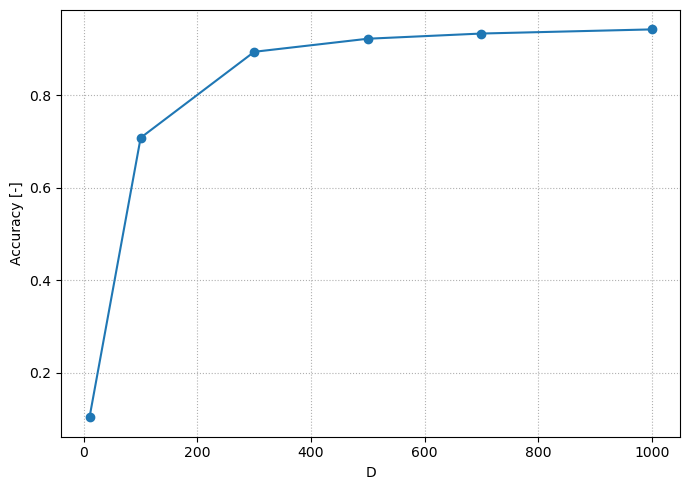

In [13]:
# Accuracy 
plt.figure(figsize=(7, 5))

plt.plot(test_D, rff_accuracy, 'o-')
plt.ylabel('Accuracy [-]')
plt.xlabel('D')

plt.grid(linestyle = ':')
plt.tight_layout()
plt.savefig('./image/accuracy_D.svg', dpi=300, format='svg')
plt.show()

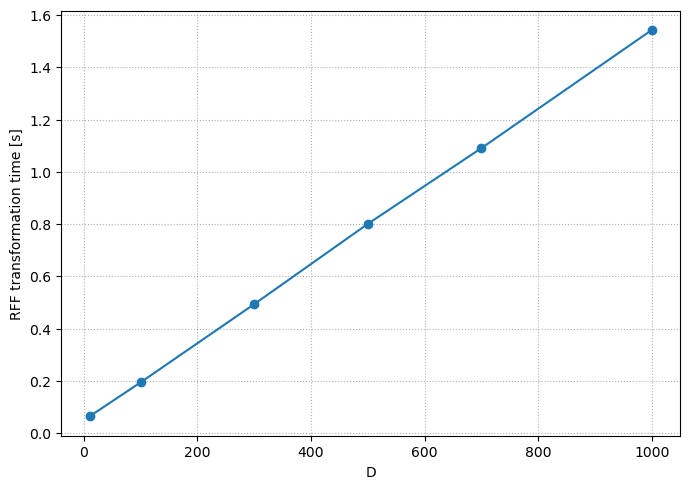

In [14]:
# Time taken to create RFF
plt.figure(figsize=(7, 5))

plt.plot(test_D, rff_generation, 'o-')
plt.ylabel('RFF transformation time [s]')
plt.xlabel('D')

plt.grid(linestyle = ':')
plt.tight_layout()
plt.savefig('./image/transformation_time_D.svg', dpi=300, format='svg')
plt.show()


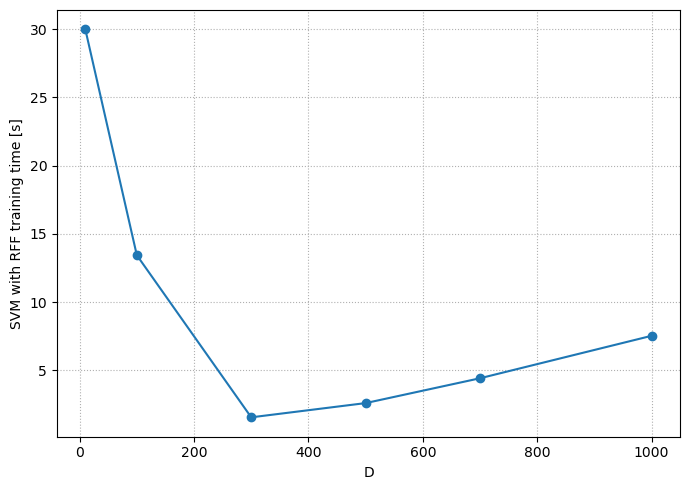

In [15]:
# Time taken to train SVM with RFF
plt.figure(figsize=(7, 5))

plt.plot(test_D, rff_train_time, 'o-')
plt.ylabel('SVM with RFF training time [s]')
plt.xlabel('D')

plt.grid(linestyle = ':')
plt.tight_layout()
plt.savefig('./image/training_time_D.svg', dpi=300, format='svg')
plt.show()

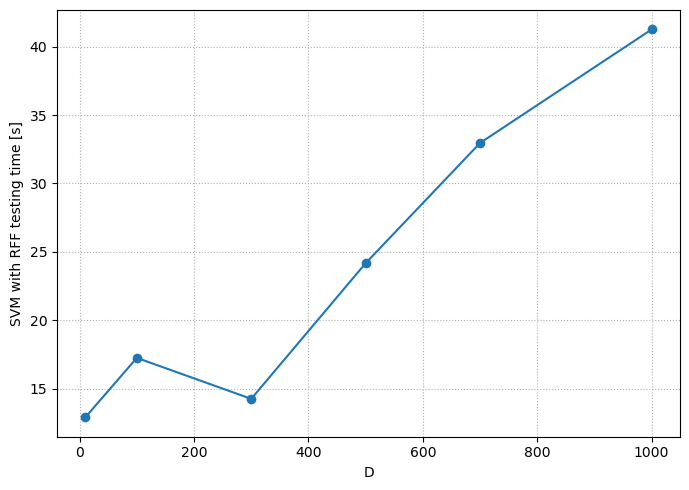

In [16]:
# Time taken to classify the testing instances
plt.figure(figsize=(7, 5))

plt.plot(test_D, rff_test_time, 'o-')
plt.ylabel('SVM with RFF testing time [s]')
plt.xlabel('D')

plt.grid(linestyle = ':')
plt.tight_layout()
plt.savefig('./image/testing_time_D.svg', dpi=300, format='svg')
plt.show()

### Good luck =D